# Lab Tutorial 02

- **Module:** Computer Vision - IN3060/INM460
- **Module leader:** [Giacomo Tarroni](mailto:giacomo.tarroni@city.ac.uk)

# Google Colab Setup
Before starting the tutorial, we need to run a few commands to set up our environment on Google Colab. To this end, make sure to have first gone through the **"Software setup guide"** document uploaded on Moodle. Also, if you are running this notebook on a local machine you can skip this section.

Run the following cell to mount your Google Drive. Follow the link, sign in to your Google account (the same account you used to store the lab materials for this tutorial!), and follow the instructions.

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now recall the path in your Google Drive where you uploaded the lab materials, fill it in below and run the cell:

In [20]:
import os

# TODO: Fill in the Google Drive path where you uploaded the lab materials
# Example: GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/Lab materials 01-20210104'

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/Computer Vision lab tutorials/Lab 02' 
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['Lab_02.ipynb', 'Lab_02_Solved.ipynb', 'Peppers.jpg', 'DogSelfie.jpg']


If everything is working correctly then running the folowing cell should print the filenames from the lab materials folder:

```
['Lab_02.ipynb', 'Peppers.jpg', 'DogSelfie.jpg']
```

# Introduction

In this lab tutorial, we will learn how to load and display images and we will start to explore some **simple image processing methods**, including some *Instagram*-like filters and contrast adjustments.

# How to properly run the tutorial

To make the best out of the tutorial, you don't have to simply execute the cells and check the output. Instead, you have to **make an effort to understand each single line of code**. Browse the Internet looking for the official documentation for each command that you don't know, and modify the code to see if you properly understood its functionality.

In addition to this, while going through the notebook you will encounter code blocks that look like this:

```python
##############################################################################
# TODO: Write the equation for a line
##############################################################################
pass
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################
```

These blocks constitute **tasks**, i.e. cells that require you to write some code to obtain a certain functionality. You should replace the `pass` statement with your own code and leave the blocks intact, like this:

```python
##############################################################################
# TODO: Instructions for what you need to do
##############################################################################
y = m * x + b
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################
```

Don't worry if you don't get them straight away: this is why we're here anyway! Also, a separate version of this notebook with solved tasks will be released for your convenience on Moodle in the next few days.

# 1: Negative four ways

In this section, we will learn how to create the negative of a given image. We will do it in four different ways, so to better understand how pixels are processed.

Let's first load the image using the `skimage` package:

In [ ]:
from skimage.io import imread

img = imread(os.path.join(GOOGLE_DRIVE_PATH, 'Peppers.jpg'))
# "Surinamese peppers" by Daveness_98 is licensed under CC BY 2.0

And now let's plot it using `matplotlib`:

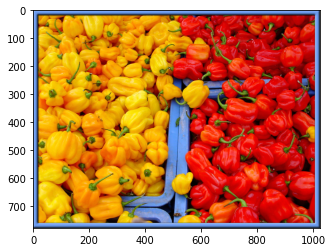

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.imshow(img)
plt.show()

As you have seen in the lecture, the fastest way to produce the negative image is the following:

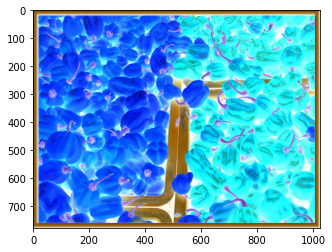

In [ ]:
img_neg = 255 - img
plt.imshow(img_neg)
plt.show()

Here, the value of each R, G, and B component at every pixel in `img` is subtracted from 255.

Let's try another method now to achieve the same result. An image is a collection of pixels (for a colour image, each having a red, green, and blue component). The pixels are in the form of a 2D grid. If you wish, you can loop over all these pixels, using a *doubly-nested loop* (loop within a loop) and invert each channel separately. 

First we can extract the size of the grid: 

In [ ]:
[height, width, channels] = img.shape
print('Image dimensions =', img.shape)

Image dimensions = (777, 1024, 3)


And now we can loop along both dimensions:

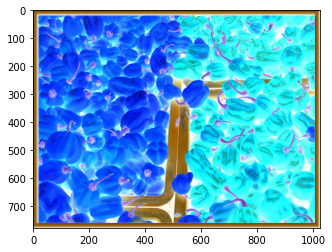

In [ ]:
img_neg = img.copy()        # Create a copy of img

for y in range(height):
  for x in range(width):
    img_neg[y, x, 0] = 255 - img[y, x, 0]      # R     
    img_neg[y, x, 1] = 255 - img[y, x, 1]      # G
    img_neg[y, x, 2] = 255 - img[y, x, 2]      # B

plt.imshow(img_neg)
plt.show()

Let's try a third method. We’ll still use a doubly-nested loop to loop over all the pixels in the image. However, since inverting an image applies the same operation to the red, green, and blue channels, we can use the colon operator to access the third dimension in the image (the colour at this pixel) and process the three colour channels with a single line of code:

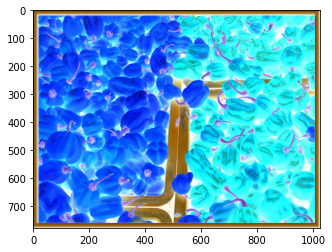

In [ ]:
img_neg = img.copy()

for y in range(height):
  for x in range(width):
    img_neg[y, x, :] = 255 - img[y, x, :]      # All three channels at once

plt.imshow(img_neg)
plt.show()

The last method makes use of a specific function in `skimage`, in the submodule `util`, which makes things as easy as possible:

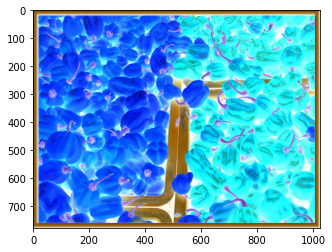

In [ ]:
from skimage.util import invert

img_neg = invert(img)
plt.imshow(img_neg)
plt.show()

## Task 1.1: Swapping colours

Now that you have seen how to access each pixel's colour channel, try to swap colours. Specifically, **swap the blue and red channels, while keeping the green unchanged**.

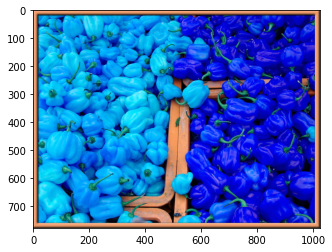

In [ ]:
img_swap = img.copy()

##############################################################################
# TODO: Swap blue and red channels, keeping green unchanged
##############################################################################
pass
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

# 2: Instagram filters

I'm sure you are all very familiar with *Instagram* filters, which can add a fancy or dramatic touch to our pictures before we post them online. In this section, we will try to implement some simple Instagram-like filters and test them on some images.

Let's start by loading and displaying an image with a nice selfie:

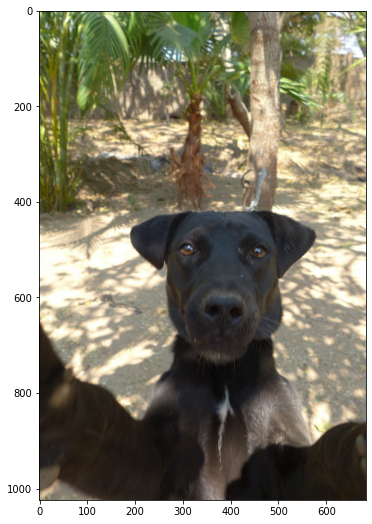

In [ ]:
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

img_rgb = imread(os.path.join(GOOGLE_DRIVE_PATH, 'DogSelfie.jpg'))
# #dog #selfie" by nchenga is licensed under CC BY-NC 2.0

plt.figure(figsize=(12, 9))     # Set figure size in inches
plt.imshow(img_rgb)
plt.show()

During the lecture, we have introduced the image processing method called **tinting**, which usually consists in applying a multiplying coefficient to one or more colour channels. 

In the example seen, we had performed tinting in the RGB space. However, it can be easily applied to other colour spaces too. For instances, what if we wanted to **double the saturation** of the image?

The first stpe would consist in performing the colour space conversion from RGB to HSV. skimage provides a handy function for that, but watch out: these conversions often trigger a data type change to avoid losses of precision.

In [ ]:
from skimage import color, img_as_float, img_as_ubyte

img_hsv = color.rgb2hsv(img_rgb)
print('Img_rgb data type =', img_rgb.dtype, ', with max channel value =', np.max(img_rgb))
print('Img_hsv data type =', img_hsv.dtype, ', with max channel value =', np.max(img_hsv))

Img_rgb data type = uint8 , with max channel value = 255
Img_hsv data type = float64 , with max channel value = 1.0


The next step consists in the actual tinting operation, just as we did in the RGB space in the lecture:

In [ ]:
s_channel = img_hsv[:, :, 1]
s_channel = s_channel * 2    # Rescale S channel
s_channel[s_channel>1] = 1   # Clip values > 1
img_hsv[:, :, 1] = s_channel

Now we can go back to the RGB space (and also to uint8 data type):

Img_rgb_sat data type = uint8 , with max channel value = 255


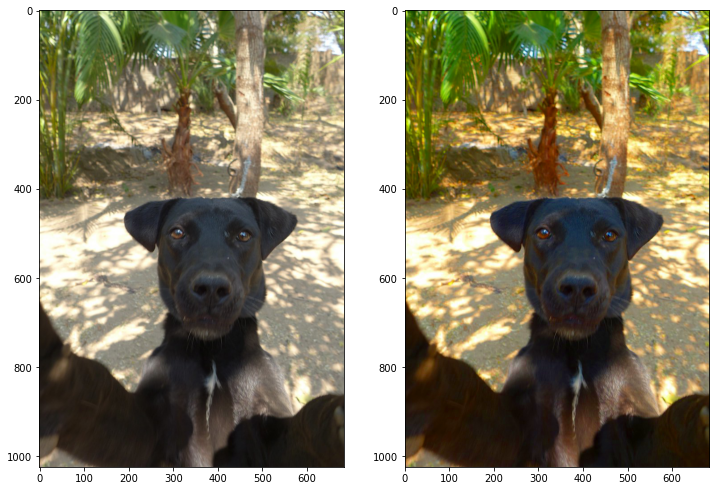

In [ ]:
img_rgb_sat = color.hsv2rgb(img_hsv)
img_rgb_sat = img_as_ubyte(img_rgb_sat)
print('Img_rgb_sat data type =', img_rgb_sat.dtype, ', with max channel value =', np.max(img_rgb_sat))

fig, ax = plt.subplots(1, 2, figsize=(12, 18))
ax[0].imshow(img_rgb)
ax[1].imshow(img_rgb_sat)
plt.show()

## Task 2.1: Adding a vignette

Another common effect adopted in Instagram filters is *vignetting*, which consists in lowering the intensity of the image as we go from the centre towards the corners. This helps draw the attention to the centre of the image, and gives the image a certain low fidelity look.

Let's first load another nice image (specifically, a close-up of *Chelsea the cat*, from the example data available in `skimage`) and already create a copy image, which will be useful when implementing the vignette:

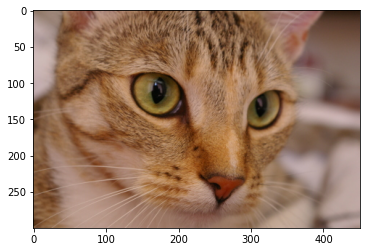

In [ ]:
from skimage import data

cat = data.chelsea()
cat_vign = cat.copy()

plt.imshow(cat)
plt.show()

Let's break down the steps of a possible vignetting algorithm. 

First, we will need to identify the centre of the image. 

Then, we will compute a function that will modify the brightness from the centre of the image. In particular, at each pixel, we will scale the brightness with a value $f$ that is equal to 1 in the centre of the image (so it has no darkening effect) and falls off to a small value approaching zero away from the centre. This will darken pixels away from the centre of the image. Mathematically, we will use the function $f = e^{-\frac{r}{width}}$, where $width$ is the image width and $r$ is the distance of a given pixel from the centre.

Think about this function for a second. At the centre of the image, $r = 0$, and $e^(0) = 1$. However, as we move away from the centre, the argument to the exponential is a negative number, producing an $f$ between 0 and 1. When we move far away from the centre, the argument to the exponential is a larger negative number, which produces an $f$ close to zero.

With this in mind, we will form a doubly-nested loop to loop over every pixel in the image. In the inner part of the loop, we will compute the radius $r$ (to this end, `numpy`'s function [`np.linalg.norm`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) might prove to be very useful). We will also compute the value of $f$ given the function above. We can use $f$ to scale the image brightness by multiplying the image’s R, G, and B components (if your image is in this colour space) or the V component (if your image is in the HSV one) to apply the vignette. 

Now that the plan is laid out in details, **add a vignette to Chelsea the cat**:


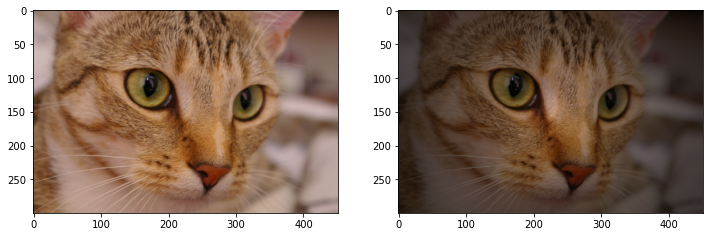

In [ ]:
##############################################################################
# TODO: Add a vignette
##############################################################################
pass
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

fig, ax = plt.subplots(1, 2, figsize=(12, 18))
ax[0].imshow(cat)
ax[1].imshow(cat_vign)
plt.show()

# 3: Contrast adjustments

Adapted from [here](https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html#sphx-glr-auto-examples-color-exposure-plot-equalize-py) and [here](https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html#sphx-glr-auto-examples-color-exposure-plot-equalize-py).

In the lecture, we have seen many different ways to perform contrast adjustments, which can greatly improve the appearance of an image. In this section, we will implement and test some of the methods described and compare them side by side.

First, we will define a function that will display both image and histogram. Make sure to understand what each line does!

In [ ]:
from skimage import img_as_float

def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram.
    """
    image = img_as_float(image)
    ax_img, ax_hist = axes

    # Display image
    ax_img.imshow(image, cmap='gray')
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    return ax_img, ax_hist

Now let's load a grayscale image from the example data available in `skimage`:

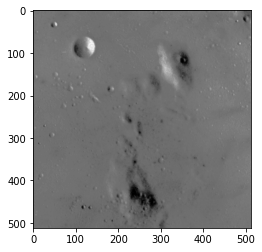

In [ ]:
from skimage import data, exposure
import matplotlib.pyplot as plt
import numpy as np

img = img_as_float(data.moon())

plt.imshow(img, cmap='gray')
plt.show()

Let's now implement three different contrast adjustments methods: **contrast stretching**, **gamma correction** and **histogram equalisation**. 

For the first one, we will stretch the histogram so that the 2nd and 98th percentile will respectively become the new 0 and 1 values. For the second, we will use a `gamma` value of 2.

In [ ]:
# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_contrast_stretch = exposure.rescale_intensity(img, in_range=(p2, p98))

# Gamma correction
gamma = 2
img_gamma = exposure.adjust_gamma(img, gamma)

# Histogram equalisation
img_hist_eq = exposure.equalize_hist(img)

Let's now plot the results:

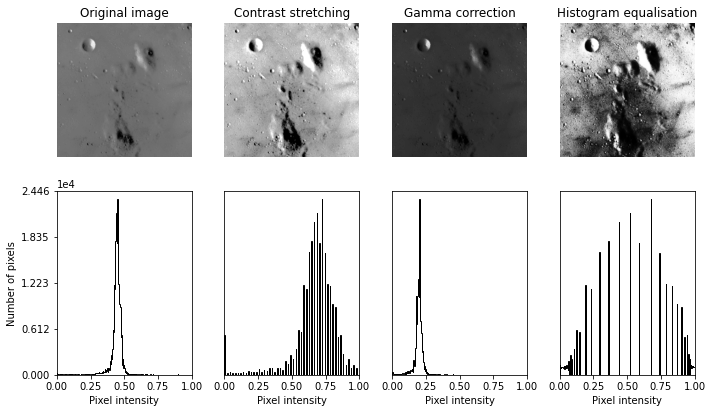

In [ ]:
fig = plt.figure(figsize=(10, 6))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = plt.subplot(2, 4, 1)
axes[0, 1] = plt.subplot(2, 4, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 4, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 3] = plt.subplot(2, 4, 4, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 4, 5)
axes[1, 1] = plt.subplot(2, 4, 6)
axes[1, 2] = plt.subplot(2, 4, 7)
axes[1, 3] = plt.subplot(2, 4, 8)

ax_img, ax_hist = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Original image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist = plot_img_and_hist(img_contrast_stretch, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist = plot_img_and_hist(img_gamma, axes[:, 2])
ax_img.set_title('Gamma correction')

ax_img, ax_hist = plot_img_and_hist(img_hist_eq, axes[:, 3])
ax_img.set_title('Histogram equalisation')

fig.tight_layout()     # prevent overlap of y-axis labels
plt.show()

Now let's try to play a bit with the parameters of the adjustments. For instance, see what happens when you **change the `gamma` parameter**. Perhaps go back to the lecture materials to understand which values to try.

## Task 3.1: Changing contrast to a different image

Substitute the moon image with Chelsea the cat. Convert it to grayscale, and test the previous brightness transformations on the image.


In [ ]:
##############################################################################
# TODO: Test the previous transformations on a different image
##############################################################################
pass
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################